In [248]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
import pickle
import random
import math

In [170]:
random.seed(3214)

In [144]:
with open('../data/pickles/main_dict.pickle', 'rb') as f:
    main_dict = pickle.load(f)

In [147]:
df = pd.read_csv('../data/csv/merge_df.csv', index_col=0)
df.head()

,track,1_mfcc_1,1_mfcc_2,1_mfcc_3,1_mfcc_4,1_mfcc_5,1_mfcc_6,1_mfcc_7,1_mfcc_8,1_mfcc_9,...,all_ss_min,all_ss_std,all_sf_max,all_sf_mean,all_sf_min,all_sf_std,all_zcr_max,all_zcr_mean,all_zcr_min,all_zcr_std
0,061010.mp3,-724.060181,174.672104,-22.694757,5.049683,-10.285789,-7.565227,-17.961994,-1.329323,-13.898221,...,0.737701,0.991601,0.240276,0.041676,0.008984,0.031454,0.108398,0.029397,0.009277,0.014918
1,061172.mp3,-692.448303,117.801537,18.185888,5.736947,5.938968,31.851004,1.060427,4.214683,-0.146251,...,-0.198049,0.948205,0.390652,0.080923,0.000357,0.059621,0.351562,0.068662,0.002930,0.058827
2,061589.mp3,-697.955811,112.710243,80.530632,18.408318,16.321367,33.912514,-1.067550,19.436161,2.497976,...,-0.194649,0.554220,0.488206,0.133584,0.017999,0.079505,0.125000,0.028202,0.000977,0.020876
3,061493.mp3,-630.083130,135.834732,-17.474176,36.666378,20.877747,3.231712,0.163455,-4.143034,-7.589878,...,0.461225,0.344698,0.404520,0.101769,0.022331,0.065322,0.267090,0.083095,0.006348,0.036801
4,061492.mp3,-692.294617,154.660141,-3.271099,31.385326,22.588284,4.178376,-0.790970,-4.321088,-4.325193,...,0.710971,0.538033,0.420857,0.083492,0.010698,0.055768,0.450195,0.098991,0.005859,0.067057


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7982 entries, 0 to 7981
Columns: 338 entries, track to all_zcr_std
dtypes: float64(336), int64(1), object(1)
memory usage: 20.6+ MB


In [171]:
test_idx = list()
while len(test_idx) < 100:
    idx = random.randint(0, df.shape[0] - 1)
    track_id = int(df.loc[idx].track[:-4])
    tags = main_dict[track_id]['all_tags']
    if len(tags) >= 10:
        test_idx.append(idx)

In [172]:
df_test = df.loc[test_idx]
df_test

,track,1_mfcc_1,1_mfcc_2,1_mfcc_3,1_mfcc_4,1_mfcc_5,1_mfcc_6,1_mfcc_7,1_mfcc_8,1_mfcc_9,...,all_ss_min,all_ss_std,all_sf_max,all_sf_mean,all_sf_min,all_sf_std,all_zcr_max,all_zcr_mean,all_zcr_min,all_zcr_std
7301,010673.mp3,-626.681091,132.151154,11.753740,45.711430,-0.209040,10.068515,-0.682384,5.395576,-4.435939,...,0.461337,0.281160,0.329500,0.124018,0.027167,0.045374,0.130859,0.031217,0.003418,0.019365
3931,066643.mp3,-687.945374,141.427277,-16.972485,19.092112,6.906140,3.117708,6.967309,-2.045398,-7.208217,...,-0.111801,0.627290,0.380662,0.080697,0.000165,0.061523,0.282227,0.049509,0.002930,0.025951
5176,000194.mp3,-782.241943,178.044266,-29.330959,18.219608,-14.123279,-10.458302,-16.387886,-5.279102,-16.686710,...,0.276664,0.634153,0.264619,0.043619,0.000129,0.038136,0.169922,0.037896,0.001953,0.017058
80,074421.mp3,-623.853394,122.672737,17.257471,4.505549,0.719744,-2.922961,-5.741470,-1.727011,-18.558123,...,0.421106,0.539590,0.264868,0.082399,0.007031,0.040712,0.224121,0.051835,0.009277,0.032241
7903,131553.mp3,-645.512512,74.718880,12.483846,45.145756,38.911320,16.187067,6.199753,0.013115,-3.431449,...,0.100123,0.391042,0.335317,0.112432,0.000625,0.050604,0.271973,0.079668,0.008789,0.049538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,025603.mp3,-705.887451,168.620865,34.891018,33.937485,15.525203,2.845042,-8.320030,2.128073,10.097413,...,0.422947,1.021024,0.493078,0.113007,0.003961,0.076067,0.147949,0.026009,0.002441,0.020538
3319,075417.mp3,-637.247192,73.643715,17.631123,33.222134,11.122272,9.398943,12.663881,11.582001,10.201411,...,0.267713,0.341603,0.467992,0.120776,0.001821,0.087565,0.348633,0.081037,0.009766,0.044586
5911,125154.mp3,-694.168884,92.781448,59.304184,42.092861,12.254707,19.374973,4.323670,7.782975,-5.282559,...,-0.067733,0.774724,0.482886,0.110169,0.003097,0.075931,0.317871,0.064865,0.002441,0.054606
3341,075436.mp3,-800.051819,241.068558,40.636051,-0.057632,6.397528,-18.648108,-1.818632,3.204657,-0.186070,...,0.923011,1.546881,1.210505,0.112725,0.010022,0.145565,0.138184,0.015291,0.000488,0.012997


In [173]:
df_train = df.loc[list(set(df.index.values) - set(test_idx))]
df_train

,track,1_mfcc_1,1_mfcc_2,1_mfcc_3,1_mfcc_4,1_mfcc_5,1_mfcc_6,1_mfcc_7,1_mfcc_8,1_mfcc_9,...,all_ss_min,all_ss_std,all_sf_max,all_sf_mean,all_sf_min,all_sf_std,all_zcr_max,all_zcr_mean,all_zcr_min,all_zcr_std
0,061010.mp3,-724.060181,174.672104,-22.694757,5.049683,-10.285789,-7.565227,-17.961994,-1.329323,-13.898221,...,0.737701,0.991601,0.240276,0.041676,8.983906e-03,0.031454,0.108398,0.029397,0.009277,0.014918
2,061589.mp3,-697.955811,112.710243,80.530632,18.408318,16.321367,33.912514,-1.067550,19.436161,2.497976,...,-0.194649,0.554220,0.488206,0.133584,1.799921e-02,0.079505,0.125000,0.028202,0.000977,0.020876
3,061493.mp3,-630.083130,135.834732,-17.474176,36.666378,20.877747,3.231712,0.163455,-4.143034,-7.589878,...,0.461225,0.344698,0.404520,0.101769,2.233087e-02,0.065322,0.267090,0.083095,0.006348,0.036801
4,061492.mp3,-692.294617,154.660141,-3.271099,31.385326,22.588284,4.178376,-0.790970,-4.321088,-4.325193,...,0.710971,0.538033,0.420857,0.083492,1.069842e-02,0.055768,0.450195,0.098991,0.005859,0.067057
5,061592.mp3,-708.504639,136.741913,9.762825,40.804737,17.343578,28.947464,15.307942,17.034895,9.786160,...,-0.039187,0.629073,0.458335,0.132431,6.568079e-11,0.090427,0.515137,0.018989,0.002441,0.039541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7977,131914.mp3,-654.926941,144.197983,-5.618096,12.815182,-4.743158,4.794647,-0.457318,2.406655,-8.439367,...,0.907090,0.585478,0.172700,0.063363,1.671647e-02,0.027547,0.136230,0.058892,0.012207,0.026086
7978,131772.mp3,-625.237183,158.683304,-10.997794,23.054964,11.636267,-1.839731,-17.972336,-9.967291,-12.986640,...,0.608825,0.747877,0.245719,0.111260,6.102545e-03,0.040364,0.070312,0.020365,0.005859,0.009048
7979,131792.mp3,-655.022644,144.006958,5.970843,14.379925,14.236056,3.561646,-4.041969,-4.800819,-3.666181,...,0.740162,0.707120,0.290256,0.078840,7.514172e-03,0.051776,0.104980,0.032318,0.000488,0.014633
7980,131624.mp3,-788.494507,75.723251,35.248608,28.392780,4.289547,18.946749,-5.460835,10.575089,-8.978883,...,0.130618,0.542250,0.212018,0.045943,9.695412e-04,0.043634,0.321289,0.102740,0.007812,0.053932


In [174]:
features_train = df_train.drop(['track'], 1)
features_test = df_test.drop(['track'], 1)

In [175]:
scaler = StandardScaler()
scaler.fit(features_train)
X_train = scaler.transform(features_train)
X_test = scaler.transform(features_test)

In [176]:
pca_viz = PCA(n_components=2)
pca_viz.fit(X_train)
X_train_viz = pca_viz.transform(X_train)
X_test_viz = pca_viz.transform(X_test)

In [177]:
pca_viz.explained_variance_ratio_

array([0.25336115, 0.13108781])

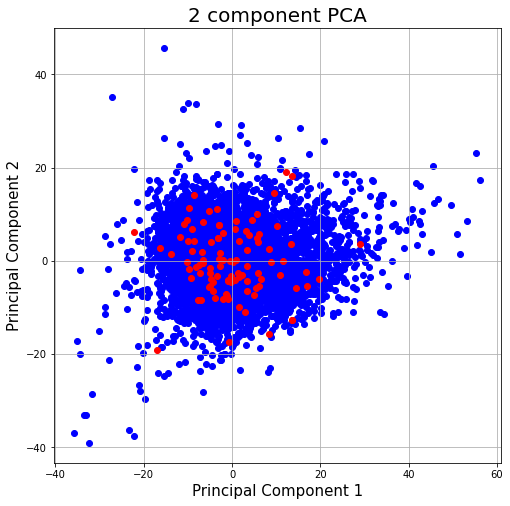

In [178]:
fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(X_train_viz[:, 0], X_train_viz[:, 1], c='b')
ax.scatter(X_test_viz[:, 0], X_test_viz[:, 1], c='r')
ax.grid()

In [179]:
pca_viz_3 = PCA(n_components=3)
pca_viz_3.fit(X_train)
X_train_viz = pca_viz_3.transform(X_train)
X_test_viz = pca_viz_3.transform(X_test)

In [180]:
pca_viz_3.explained_variance_ratio_

array([0.25336115, 0.13108781, 0.09731651])

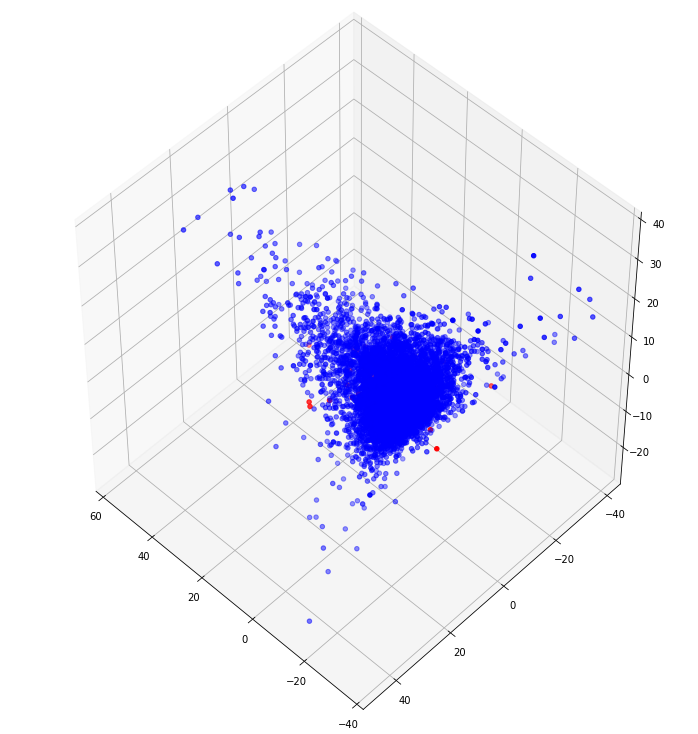

In [181]:
fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_test_viz[:, 0], X_test_viz[:, 1], X_test[:, 2], c='r')
ax.scatter(X_train_viz[:, 0], X_train_viz[:, 1], X_train_viz[:, 2], c='b')


In [182]:
pca = PCA(0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [183]:
X_train.shape

(7885, 103)

In [184]:
X_test.shape

(100, 103)

In [185]:
pca.explained_variance_ratio_

array([0.25336115, 0.13108781, 0.09731651, 0.06234841, 0.03098642,
       0.03002928, 0.02229705, 0.01794692, 0.0157721 , 0.01408346,
       0.01340407, 0.01194723, 0.01122062, 0.00988551, 0.00972036,
       0.00921744, 0.00883349, 0.00831124, 0.0080811 , 0.00772765,
       0.00760925, 0.00711752, 0.00681014, 0.00650139, 0.00571301,
       0.00528444, 0.00497456, 0.00462875, 0.00441812, 0.00421898,
       0.00413411, 0.00386117, 0.00365479, 0.00339585, 0.00331329,
       0.0031138 , 0.00305848, 0.00297774, 0.00273598, 0.0027088 ,
       0.0026054 , 0.00255583, 0.00251643, 0.00245567, 0.00233608,
       0.00229071, 0.00223778, 0.00217343, 0.00210047, 0.00202745,
       0.00186903, 0.00184652, 0.0018364 , 0.00180143, 0.00171471,
       0.00167378, 0.00166393, 0.00164153, 0.00158095, 0.00152874,
       0.00151467, 0.00145752, 0.00143761, 0.00142154, 0.00138637,
       0.00137378, 0.00134631, 0.00132267, 0.00130694, 0.00128762,
       0.00124785, 0.00123397, 0.00121697, 0.00118812, 0.00114

In [186]:
neigh = NearestNeighbors(10)
neigh.fit(X_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [246]:
def count_good_recommend(query_idx, answer_list, trhold):
    counter = 0
    query_id = int(df_test.iloc[query_idx].track[:-4])
    relevant = [query_id]
    query_tags = main_dict[query_id]['all_tags']
    for idx in answer_list:
        answer_id = int(df_train.iloc[idx].track[:-4])
        answer_tags = main_dict[answer_id]['all_tags']
        score = 0
        i = 0
        for tag in answer_tags:
            if tag in query_tags:
                i += 1
        if i == 0:
            continue
        
        precision = i / len(answer_tags)
        recall = i / len(query_tags)
        score = 2 * precision * recall / (precision + recall)
        if score >= trhold:        
            counter += 1
            relevant.append(answer_id)
    return counter, relevant

In [261]:
def count_ndcg(neighbors, relevant_list):
    dcg = 0
    idcg = 0
    for i in range(len(neighbors)):
        track = int(df_train.iloc[neighbors[i]].track[:-4])
        if track in relevant_list:
            dcg += 1 / math.log(i + 2, 2)
        idcg += 1 / math.log(i + 2, 2)
    ndcg = dcg / idcg
    return ndcg

In [265]:
mean_ap = 0
ndcg = 0
for i in range(100):
    neighbors = neigh.kneighbors([X_test[i]])[1][0]
    relevant_num, relevant_list = count_good_recommend(i, neighbors, trhold=0.3)
    p_at_10 = relevant_num / 10
#     if p_at_10 > 0.5: 
#     print(i, relevant_list)
    mean_ap += p_at_10
    ndcg += count_ndcg(neighbors, relevant_list[1:])
mean_ap /= 100 
mean_ndcg = ndcg / 100

In [266]:
mean_ap

0.14399999999999996

In [267]:
mean_ndcg

0.15669151067305598

In [234]:
answers = neigh.kneighbors([X_test[42]])[1][0]
answers

array([2842, 5045, 3408, 3140, 2073, 2006, 1599, 5981, 5520, 1297])

In [235]:
query_id = int(df_test.iloc[42].track[:-4])

In [236]:
query = main_dict[query_id]['all_tags']
query

['punk',
 'reggae - dub',
 'electronic',
 'love',
 'international',
 'business of panic',
 'stop that mission',
 'all the stars',
 'reggae',
 'all back to mine',
 'world',
 'dub']

In [237]:
answer_id = int(df_train.iloc[2842].track[:-4])

In [238]:
answer = main_dict[answer_id]['all_tags']
answer

['female vocalists',
 'alternative',
 'electronic',
 'mgee',
 'chillout',
 'indie',
 'synth pop',
 'downtempo',
 'electropop',
 'indie pop',
 'maine',
 'under 2000 listeners',
 'pop',
 'swedish']

In [220]:
j = 1
for some in answer:
    if some in query:
        j += 1
aprecision = j / len(answer)
arecall = j / len(query)
b = 1
f1 = 2 * aprecision * arecall / (aprecision + arecall)
print(aprecision, arecall, f1)

1.0 0.2 0.33333333333333337


In [96]:
count_good_recommend(11, answers, 0.3)

10

In [215]:
df_test.iloc[5].track[:-4]

'024431'

In [200]:
df_train.iloc[4254].track[:-4]

'142079'

In [55]:
i

0

In [42]:
len(main_dict.keys())

7324

In [98]:
"AAAA BBB".lower()

'aaaa bbb'

In [53]:
with open('../data/pickles/main_dict.pickle', 'rb') as f:
    main_dict = pickle.load(f)

In [111]:
with open('../data/pickles/main_dict.pickle', 'wb') as f:
    pickle.dump(main_dict, f)